<a href="https://colab.research.google.com/github/Danielsuse/riskmeasures/blob/main/RiskMeasures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color = #000066 size=7> Métodos Cuantitativos en Finanzas - FC  </font>

<br><font color = #000000 size=6.5> Risk Measures </font>

 <br><font color = silver size=5> Author: Luis Pavón, MSc, CQF </font>
 <br><font color = silver size=3> <luis_lept03@ciencias.unam.mx> </font>
 <br><font color = silver size=2> September,2022 </font>

In [ ]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import yahoo finance library
import yfinance as yf

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import norm distribution function
from scipy.stats import norm

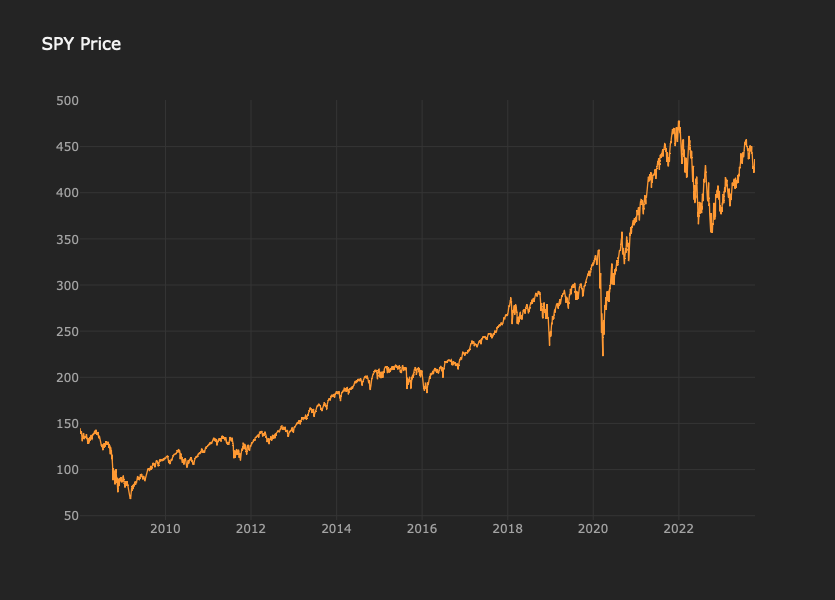

In [ ]:
# Fetch data by specifying the the start and end dates
df = yf.download('SPY', start='2008-01-01', progress=False)['Close']

# Display the first five rows of the dataframe to check the results.
df.iplot(kind='line',title='SPY Price')

In [ ]:
returns = df.pct_change().dropna()
returns=returns[-365:]
returns

Date
2022-05-03    0.004584
2022-05-04    0.030453
2022-05-05   -0.035543
2022-05-06   -0.005969
2022-05-09   -0.032017
                ...   
2023-10-09    0.006402
2023-10-10    0.005205
2023-10-11    0.004096
2023-10-12   -0.006096
2023-10-13   -0.004981
Name: Close, Length: 365, dtype: float64

In [ ]:
# Parametric VaR

# Calculate mean and standard deviation
mean = np.mean(returns)
stdev = np.std(returns)

VaR_95=norm.ppf(1-0.95,mean,stdev)

print("95% VaR of SPY:", round(VaR_95*100,4))

95% VaR of SPY: -2.0249


In [ ]:
# Historical VaR
hVaR_95 = returns.quantile(0.05)

print("95% VaR of SPY:", round(hVaR_95*100,4))

95% VaR of SPY: -1.8358


In [ ]:
# Monte Carlo

# Number of simulations
n_sims = 100000

# Simulate returns and sort
sim_returns = np.random.normal(mean, stdev, n_sims)

MCVaR_95 = np.percentile(sim_returns, 5)

print("95% VaR of SPY:", round(MCVaR_95*100,4))

95% VaR of SPY: -2.0324


In [ ]:
# CVaR o ES o AVaR

CVaR_95=returns[returns<=hVaR_95].mean()

print("95% CVaR of SPY:", round(CVaR_95*100,4))

95% CVaR of SPY: -2.7923


In [ ]:
out=pd.DataFrame({'VaR (Normal)':VaR_95*100,'VaR (Historico)':hVaR_95*100, 'VaR (MonteCarlo)':MCVaR_95*100,'CVaR':CVaR_95*100},index={'95% de Confianza'})
out

,VaR (Normal),VaR (Historico),VaR (MonteCarlo),CVaR
95% de Confianza,-2.024931,-1.835773,-2.032395,-2.792335
